# Classification algorithms

### Dataset description, visualisation, and pre-processing

<div class="alert alert-block alert-warning">The Heart Disease Detection dataset is composed of a set of characteristics used to determine if a patient has heart disease or not. Its main purpose is to perform classification based on the target variable, 'HeartDisease,' which indicates the presence of heart disease in the patient. This variable has integer values where 0 represents no disease and 1 indicates the presence of disease.
<div/>

<div class="alert alert-block alert-danger"> 
    
1. Import the Heart Disease Detection dataset.
2. Display and try to understand each feature in this dataset.
3. Display a summary of the dataset.
4. Verify if the dataset contains any missing values.
5. Plot the distribution of samples according to the target variable HeartDisease. Determine if the dataset is balanced.
6. Apply dummy encoding to all categorical features in the dataset.
7. Display the Pearson correlation matrix. Is there a correlation with the class and between features by considering a thresholed of 0.5?
8. Display the distribution of all features on all the scaled data (except binary features) using a histplot. What do you observe?
9. Split the data into a training and a testing set using a ratio of 0.3.
10. Normalize the data using z-score scaling.
<div/>

In [23]:
import pandas as pd
data = pd.read_csv("heart.csv")  
print(data.info())
print(data.describe())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  1

In [24]:
print(data.isnull().sum())


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


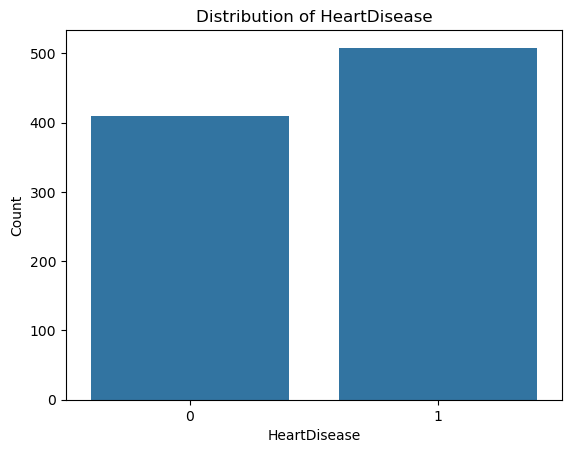

HeartDisease
1    508
0    410
Name: count, dtype: int64


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='HeartDisease', data=data)
plt.title('Distribution of HeartDisease')
plt.xlabel('HeartDisease')
plt.ylabel('Count')
plt.show()

print(data['HeartDisease'].value_counts())


In [26]:
data = pd.get_dummies(data, drop_first=True)


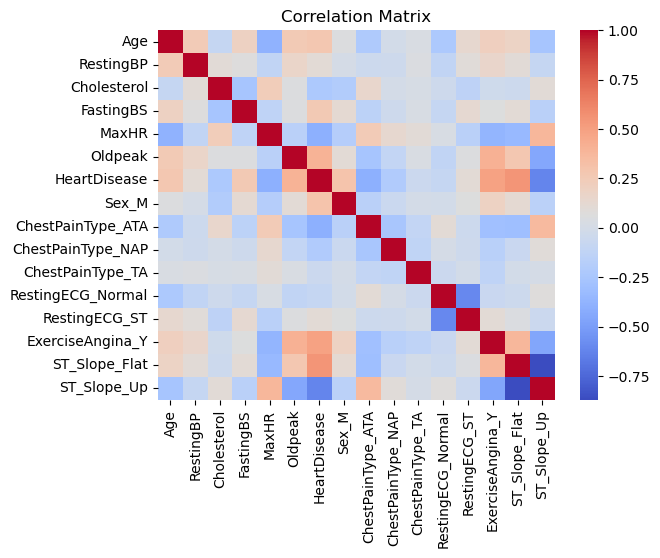

Age                       NaN
RestingBP                 NaN
Cholesterol               NaN
FastingBS                 NaN
MaxHR                     NaN
Oldpeak                   NaN
HeartDisease         1.000000
Sex_M                     NaN
ChestPainType_ATA         NaN
ChestPainType_NAP         NaN
ChestPainType_TA          NaN
RestingECG_Normal         NaN
RestingECG_ST             NaN
ExerciseAngina_Y          NaN
ST_Slope_Flat        0.554134
ST_Slope_Up         -0.622164
Name: HeartDisease, dtype: float64


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

strong_corr = corr_matrix[abs(corr_matrix) > 0.5]
print(strong_corr['HeartDisease'])


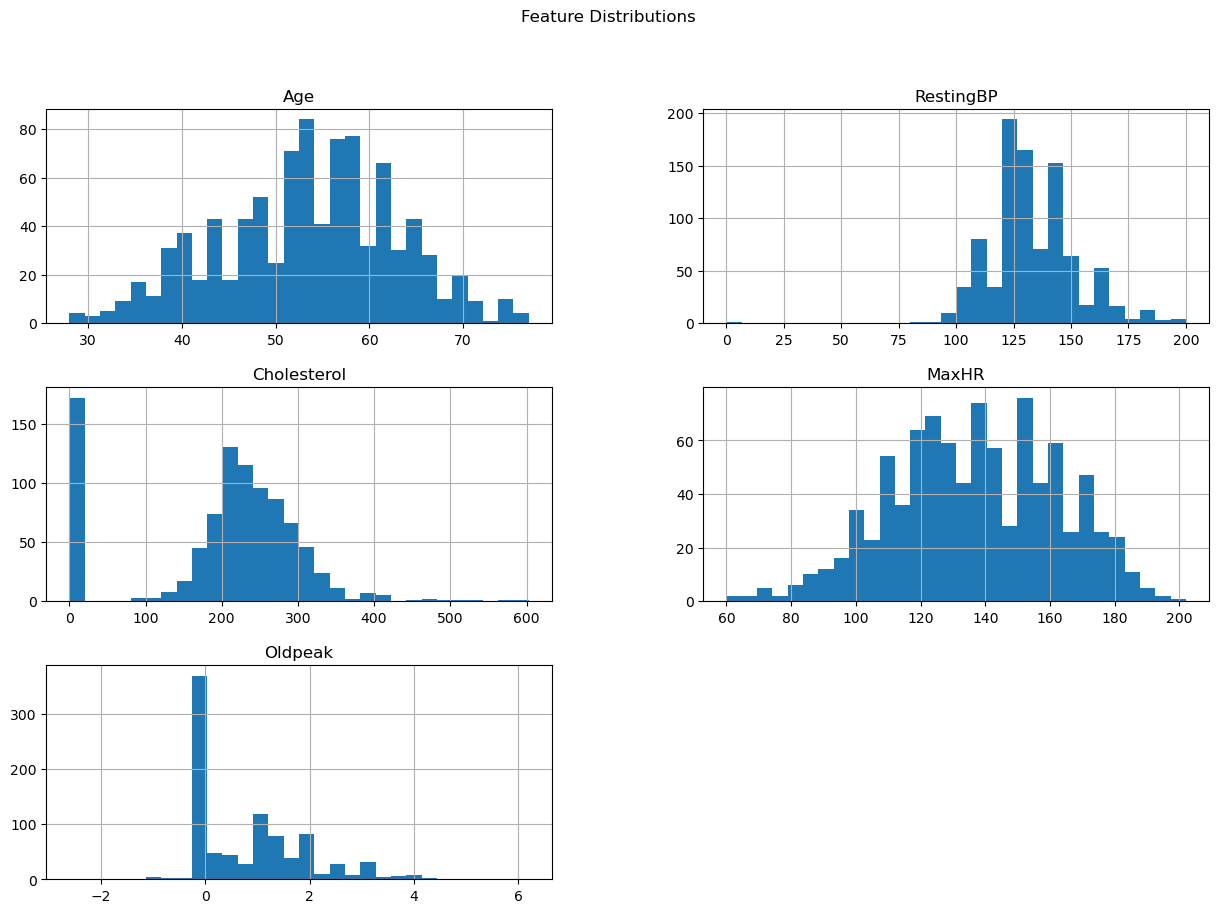

In [28]:
import matplotlib.pyplot as plt

continuous_features = [col for col in data.columns if data[col].nunique() > 2]
data[continuous_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.show()


In [29]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


<div class="alert alert-block alert-danger"> 
    
1. Train the following algorithms on the generated training dataset: Gaussian Naive Bayes, KNN(K=3), and decision tree (max_depth=6).
2. Display and save the tree generated by the decision tree algorithm.
3. Implement the SVM algorithm from scratch and apply it to the dataset.
4. Print the classification reports and confusion matrices of all models on the testing set. Discuss the obtained results.
5. Display the ROC curves of the generated models in one plot.
6. Which evaluation metric do you recommend for this dataset?
7. Predict the class of the third sample from the testing set based on the best-performing model.
8. Perform the cross-validation evaluation method on the best model based on the selected metric.
</div>

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)


dt = DecisionTreeClassifier(max_depth=6, random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)


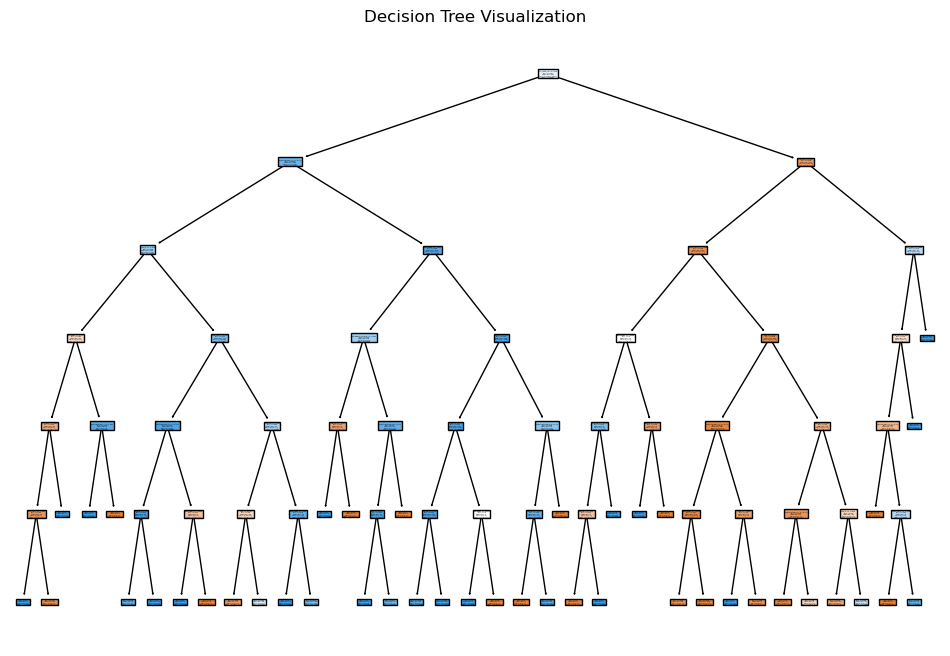

In [32]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'])
plt.title("Decision Tree Visualization")
plt.savefig("decision_tree.png")
plt.show()


In [33]:
import numpy as np
class SVM:
    def __init__(self, learning_rate=0.001, n_iter=1000, C=1):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.C = C

    def fit(self, X, y):
        y = np.where(y == 0, -1, 1)  # Ensure labels are in the correct format
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.n_iter):
            for idx, x_i in enumerate(X):
                if y[idx] * (np.dot(x_i, self.weights) + self.bias) < 1:
                    self.weights -= self.learning_rate * (2 * self.C * self.weights - np.dot(x_i, y[idx]))
                    self.bias -= self.learning_rate * self.C * y[idx]
                else:
                    self.weights -= self.learning_rate * 2 * self.C * self.weights

    def predict(self, X):
        predictions = np.sign(np.dot(X, self.weights) + self.bias)
        return np.where(predictions == -1, 0, 1)  
    



svm = SVM()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
 
models = {'GaussianNB': gnb_pred, 'KNN': knn_pred, 'DecisionTree': dt_pred, 'SVM': svm_pred}

for model, pred in models.items():
    print(f"{model} Classification Report:")
    print(classification_report(y_test, pred, zero_division=1))  
    print(f"{model} Confusion Matrix:")
    print(confusion_matrix(y_test, pred))
    print("\n")


GaussianNB Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       112
           1       0.92      0.87      0.89       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276

GaussianNB Confusion Matrix:
[[ 99  13]
 [ 21 143]]


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       112
           1       0.92      0.84      0.88       164

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.86       276
weighted avg       0.87      0.86      0.86       276

KNN Confusion Matrix:
[[100  12]
 [ 27 137]]


DecisionTree Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.86      0.80       112
           1       0.89      0.80      

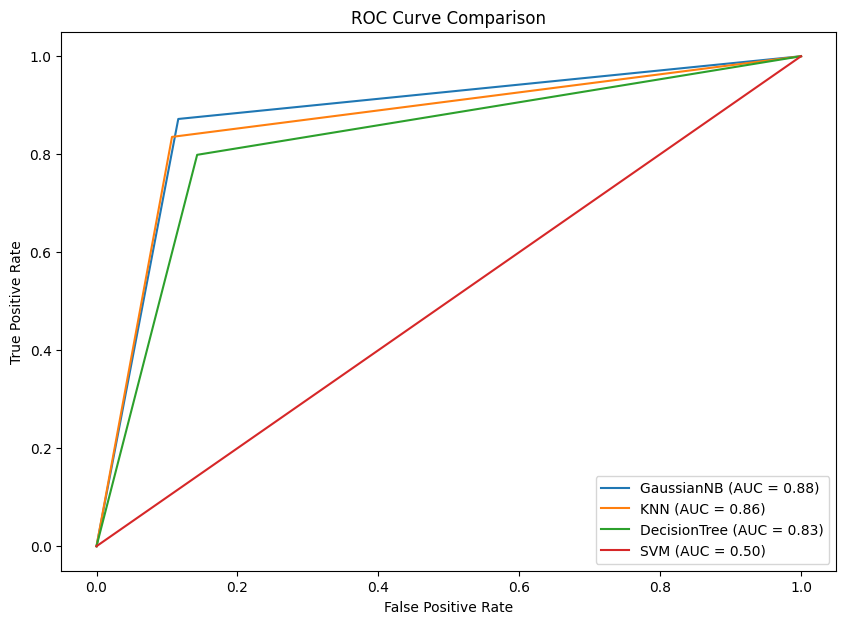

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

for model, pred in models.items():
    fpr, tpr, _ = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [ ]:
sample = X_test[2].reshape(1, -1)
prediction = dt.predict(sample)
print(f"Prediction for the third sample: {prediction}")


Prediction for the third sample: [1]


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt, X, y, cv=10, scoring='f1')
print(f"Cross-validation F1-scores: {scores}")
print(f"Mean F1-score: {scores.mean()}")


Cross-validation F1-scores: [0.86868687 0.94117647 0.76404494 0.88659794 0.875      0.87719298
 0.82758621 0.72916667 0.7173913  0.72527473]
Mean F1-score: 0.8212118106881569
